# Trabajo en grupo 2018 - Filtros de imágenes
_Arquitectura de Computadores, 2018._

## Autores:
 - Álvaro Baños Gomez, UO245853.
 - Guillermo Facundo Colunga, UO236856.
 - Alejandro León Pereira, UO258774.
 - Iñaki Salgado Uralde, UO237133.

# Sumario
--------------
* [Introducción](#Introducción)
 - [Entorno de trabajo](#Entorno-de-trabajo)
 - [Problema a resolver](#Problema-a-resolver)
* [Algoritmo de fusión de imágenes](#Algoritmo-de-fusión-de-imágenes)
 - [Definición]()
 - [Función general de transformación]()
 - [Análisis de la fgt]()
* [Versión monohilo secuencial]()
 - [Pseudocódigo]()
 - [Análisis del algoritmo implementado]()
 - [Conclusiones]()
* [Versión monohilo SIMD]()
 - [Instrucciones SIMD soportadas]()
 - [Algoritmo SIMD]()
   - [Pseudocódigo]()
 - [Análisis del algoritmo implementado]()
 - [Conclusiones]()
* [Versión multihilo]()
 - [Concurrencia del sistema de prueba]()
 - [Algoritmo multihilo]()
   - [Worker]()
   - [WorkerInfo]()
   - [Pseudocódigo]()
 - [Análisis del algoritmo implementado]()
 - [Conclusiones]()
* [Conclusiones generales]()
 
 

---------------

# Introducción

## Entorno de trabajo

Como entorno de trabajo se usará una máquina virtual ubuntu y el IDE Eclipse para C/C++. La máquina virtual se configura con 4 procesadores, que se corresponde con el máximo número de procesadores que contiene el sistema donde se ejecuta la máquina virtual. Dicha configuración se ilustra con la siguiente imágen.

![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/configuration.png)

Para ver la configuración final de la cpu de la máquina virtual encontrarás el archo cpu-info en el directorio `/data`.

## Problema a resolver

# Algoritmo de fusión de imágenes

Para la realización de este trabajo en grupo se nos asignó el modo de **fusión de imágenes por amplitud** sobre imágenes con componentes RGB y con tipo de datos `float`, a continuación se explica el algoritmo de fusión.

## Representación de las imágenes

Cada imagen estará representada por un único vector de información donde estarán todas sus componentes:

$$v = [ r_{1}, r_{2}, r_{3},...,r_{n}, g_{1}, g_{2}, g_{3},...,g_{n}, b_{1}, b_{2}, b_{3},...,b_{n}]$$


## Definición

La fusión de imágenes por amplitud tiene como fin juntar dos imágenes en una sola, para realizar esta tarea usa como referencias las amplitudes de las imágenes, que no es más que los valores de cada una de las componentes de la imagen. A continuación está la fórmula que este algorimo emplea para calcular el valor de cada pixel de la imagen resultante.

$$(x{_{3}}, y{_{3}}, z{_{3}}) = \left ( \frac{\sqrt{x{_{1}}^{2} + x{_{2}}^{2}}}{\sqrt{2}},  \frac{\sqrt{y{_{1}}^{2} + y{_{2}}^{2}}}{\sqrt{2}}, \frac{\sqrt{z{_{1}}^{2} + z{_{2}}^{2}}}{\sqrt{2}} \right )$$

Donde $(x{_{3}}, y{_{3}}, z{_{3}})$ son las coordenadas RGB de la imágen resultante. 

## Función general de transformación

Cómo se puede ver en la fórmula anterior se aplica la misma operación a cada componente de las imágenes para obtener la imágen resultante. Entonces, se puede refactorizar la fórmula para abstraer una función general de transformación de la siguiente forma.

$$f(imagen_{x}, imagen_{y}) = \left ( \frac{\sqrt{imagen_{x}^{2} + imagen_{y}^{2}}}{\sqrt{2}} \right )$$

## Análisis de la función general de transformación

El dominio de valores de las diferentes componentes de un pixel se define como (0.0 - 255.0), esto es, todos los valores comprendidos entre 0.0 y 255.0, ambos incluidos. Por tanto tenemos que explorar si nuestra función cumple que para cualquier imágen válida dada nos genere otra válida. En caso contrario deberíamos de aplicar algún mecanismo para hacerla válida.

Imports necesarios para el análisis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

A continuación definimos dos vectores que simularán nuestra imágenes. Dichos vectores contendrán todos los valores posibles desde 0.0 a 255.0.

In [2]:
values_1 = np.arange(256.0)
values_2 = np.arange(256.0)

Realizamos una implementación rápida de la fórmula general de transformación

In [3]:
def fusion(x, y): return (np.sqrt(x**2 + y**2)/math.sqrt(2))

Una vez tenemos definidas nuestras imágenes (vectores) y nuestra función de transformación, aplicamos la función a la imagen A sobre la imágen A (para obtener $f(0,0), f(1,1), ..., f(255,255)$) y a la imagen A sobre A^-1 ($f(0,255), f(1,254), ..., f(0,255)$). De esta forma obtenemos dos imágenes resultantes que representan:

- La fusión de mínimos y máximos.
- La fusión de una imágen con su inversa.

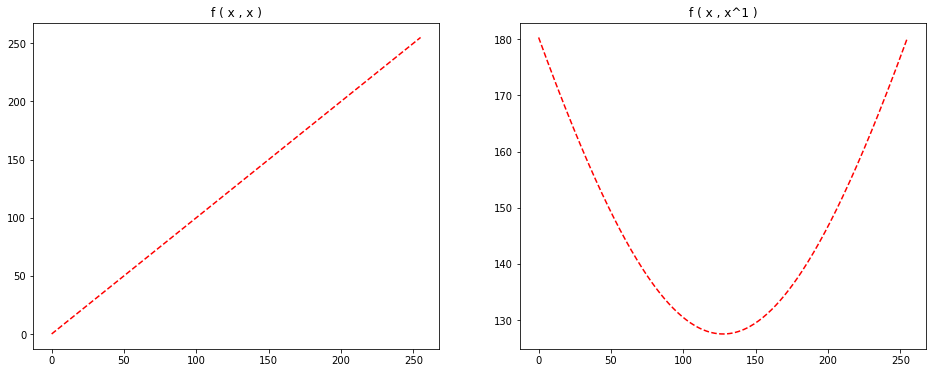

In [4]:
f, axarr = plt.subplots(1,2, figsize=(16,6))
axarr[0].plot(fusion(values_1, values_2), '--r')
axarr[0].set_title('f ( x , x )')
axarr[1].plot(fusion(values_1, values_2[::-1]), '--r')
axarr[1].set_title('f ( x , x^1 )')
plt.show()

Parece que el máximo valor se alcalza cuando aplicamos la función de transformación sobre la misma imágen, lo que tiene sentido ya que tiene que las variables de la función de transformación toman sus valores máximos $(255.0)$. Pero para asegurar vamos a extraer el máximo del resultado de aplicar la fucnión sobre la misma imagen:

In [7]:
print("Valor mínimo de aplicar la función sobre vectores en rango [0.0, ..., 255.0]:",
      min(fusion(values_1, values_2)))
print("Valor máximo de aplicar la función sobre vectores en rango [0.0, ..., 255.0]:",
      max(fusion(values_1, values_2)))

Valor mínimo de aplicar la función sobre vectores en rango [0.0, ..., 255.0]: 0.0
Valor máximo de aplicar la función sobre vectores en rango [0.0, ..., 255.0]: 255.0


Por lo tanto podemos asegurar que la imágen resultante de aplicar este algoritmo no saturará los valores de destino. Esto podría comprobarse también con un análisi matemático del problema, ya que:

$$\lim_{\left ( x,y \right ) \rightarrow \left [ 0.0,0.0 \right ]} \frac{\sqrt{x^{2} + y^{2}}}{\sqrt{2}} = 0.0$$

$$\lim_{\left ( x,y \right ) \rightarrow \left [ 255.0,255.0 \right ]} \frac{\sqrt{x^{2} + y^{2}}}{\sqrt{2}} = 255.0$$

----------------------------------------------
# Versión monohilo secuencial

En esta versión del programa se imlementará la fusión de transformación sobre todos y cada uno de los elementos de los vectores de información de las imágenes de entrada, el resultado se guardará en el vector de información de la imagen de salida.

Para ello inicialmente se diseña un algoritmo en pseudocódigo.

### Pseudocódigo
```
PARA CADA i DESDE i=0 HASTA i < n_elementos_vectores_información
        
    imagen_salida[i] = sqrt(imagen_entrada1[i]^2 + imagen_entrada2[i]^2) / sqrt(2)
```

Una vez tenemos el algortimo diseñado en pseudocódigo procedemos a realizar su implmentación en C++.

### C++
```c++
for (int i = 0; i < imagesSize; i++) {
    p_outputImage[i] = 
        sqrtf(pow(p_inputImage1[i], 2.0f) + pow(p_inputImage2[i], 2.0f)) / SQRT2;
}
```

Se puede encontrar la implementación completa en [Main.cpp](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/blob/master/Singlethread/Src/Main.cpp).

> **Nota**: _Como la ejecucion del algoritmo anterior dura menos de 5 segundos se anida dentro de un bucle `for` que lo repetirá 25 veces. Con lo que el tiempo de la ejecución del programa será superior a los 5 segundos, **pero se estará ejecutando el algoritmo 25 veces**._

> **Nota**: _En el agortimo anterior se ha realizado una pequeña optimización sacando factor común a sqrt(2) fuera del bucle. Por lo que este valor no se computa cada vez que se necesita si no que se define en una constante al inicio del Main.cpp._

> **Nota**: _Como se puede ver en el algoritmo no se realiza ningún tipo de validación sobre los datos resultantes de aplicar la función de transformación, esto es, por que durante el análisis se probó que para valores de entrada en un rango [0.0, ..., 255.0] los valores resultantes estarán siempre comprendidos en ese mismo rango._

## Análisis del algoritmo implementado
Para el algoritmo anterior se obtienen los siguientes datos tras realizar 10 ejecuciones en modo release:

In [43]:
import pandas as pd
executions = 25.0
data = pd.Series([5.508572,5.464005,5.391564,5.476413,5.351255,5.437835,5.454087,5.444019,5.426735,5.429995],
                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
unique_executions = data/executions
table = pd.DataFrame({'Duración (s) X 3 Ejecuciones':data})
table

,Duración (s) X 3 Ejecuciones
1,5.508572
2,5.464005
3,5.391564
4,5.476413
5,5.351255
6,5.437835
7,5.454087
8,5.444019
9,5.426735
10,5.429995


De la tabla anterior podemos obtener un histograma con la frecuencia con la que se obtienen los distintos tiempos de ejecución del algoritmo (para 1 única ejecución). De él se puede deducir que la mayoría de las ejecuciones están centradas en torno a 0.2175 segundos. Lo que a priori parece ser la media para 1 única ejecución de nuestro algoritmo.

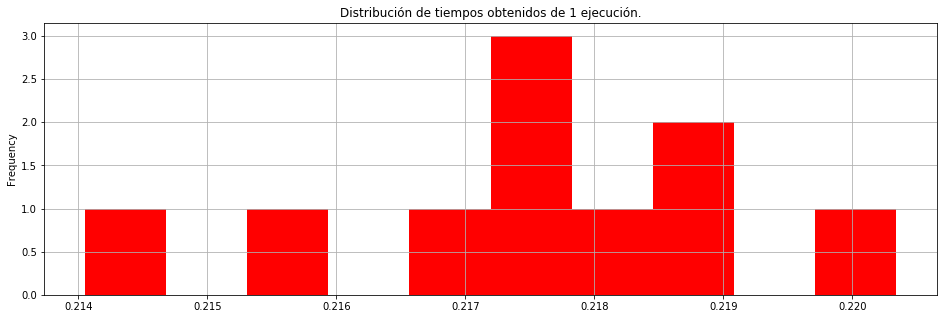

In [44]:
import matplotlib.pyplot as plt
unique_executions.plot(kind='hist',color='red',
                        grid=True, title='Distribución de tiempos obtenidos de 1 ejecución.',
                        figsize=(16,5))
plt.show()

In [45]:
from scipy import stats
import numpy as np
import scipy as sp
mean = np.mean(data)
mean_iterative = mean
std = np.std(data)
var = data.var()
print("Media", executions,"ejecuciones:", mean, "s.")
print("Desviación estándar", executions,"ejecuciones:", std, ".")
print("Intervalo de confianza", executions, "ejecuciones:",stats.norm.interval(0.05,loc=mean,scale=std) ,".")
print("Media 1 ejecución:", np.mean(unique_executions), "s.")

Media 25.0 ejecuciones: 5.438448 s.
Desviación estándar 25.0 ejecuciones: 0.0415899546333 .
Intervalo de confianza 25.0 ejecuciones: (5.4358400279501407, 5.4410559720498579) .
Media 1 ejecución: 0.21753792 s.


## Conclusiones

Para el problema dado: 
- Se diseñó un algoritmo iterativo que aplica la función de transformación dada a los dinstintos elementos de las componentes RGB de 2 imágenes y crea una tercera. 
- Tras 10 muestreos se puede decir que dicho algoritmo es capáz de procesar 25 imágenes en $5.438448$ segundos. O lo que es lo mismo, $4.6$ imágenes por segundo.

------------------------------------
# Versión monohilo SIMD

Esta versión consiste en, con el programa anterior sustituir aquellas instrucciones que se realicen con caracter repetitivo cobre elementos de un vector por instrucciones SIMD, estas operaciones permiten realizar una misma tarea sobre varios elementos de un vector al mismo tiempo. Y por tanto se debería de optimizar el programa ya que se realizarán menos operaciones.

Así mismo, para este trabajo en grupo se nos asignó usar instrucciones SIMD de tamaño 128 bits y tipo `float`. Con lo que sabiendo que un `float` necesita 32 bits podemos operar sobre 128/34 = 4 elementos de los vectores de píxeles al mimo tiempo.

## Instrucciones SIMD soportadas

En nuestro caso se soportan las instrucciones: MMX, SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2, AVX. Esto puede comprobarse en el documento `cpuinfo.txt` que se suministra en el directorio `/data`.

## Algoritmo SIMD

De la misma forma que hicimos en el algoritmo secuencial aplicamos nuestra función general de transformación a cada uno de los valores de los vectores de información de las imágenes de entrada y guardamos el resultado en la imagen de salida.

### Pseudocódigo

$imagenEntrada_{1} = [ r_{11}, r_{12}, r_{13},...,r_{1n}, g_{11}, g_{12}, g_{13},...,g_{1n}, b_{11}, b_{12}, b_{13},...,b_{1n}]$

$imagenEntrada_{2} = [ r_{21}, r_{22}, r_{23},...,r_{2n}, g_{21}, g_{22}, g_{23},...,g_{2n}, b_{21}, b_{22}, b_{23},...,b_{2n}]$

$imagenSalida = [ancho \cdot alto \cdot numeroComponentes]$

PARA CADA i DESDE i=0 HASTA i < $(ancho \cdot alto \cdot numeroComponentes)$

$$imagenSalida[i] = \frac{\sqrt{imagenEntrada_{1}[i]^{2} + imagenEntrada_{2}[i]^{2}}}{\sqrt{2}}$$

### C++

Para implamentar el pseudocódigo anterior con instrucciones SIMD lo primero fue identificar qué intruscciones debíamos usar. Recordemos que debemos de trabajar sobre vectores de información con formato de `float`. A esto se le suma la restricción de usar paquetes de datos de 128 bits, por lo que estas són las instrucciones intrínsecas que usaremos para implementar el algoritmo.

 - Para cargar los vectores de información -> `_mm_loadu_ps`.
 - Para realizar el cuadrado usaremos una múltiplicación de un elemento por el mismo ya que no existe la función potencia necesaria, por tanto -> `_mm_mul_ps`.
 - Para sumar -> `_mm_add_ps`.
 - Para la raíz cuadrada -> `_mm_sqrt_ps`.
 - Para dividir -> `_mm_div_ps`.
 - Para guardar en el vector de infomación de la imagen resultante -> `_mm_storeu_ps`.
 
 > **Nota:** En las instrucciones intrínsecas anteriores el sufijo u en load y store significa que se realiza sobre elementos no alineados. Y el sufijo `_ps` en todas las instrucciones nos indica que es una operación con punto flotante.

Una vez tenemos las instrucciones identificadas pasamos a realizar la implementación en código, lo que supone dividir la función general de transformación en operaciones simples y juntar los resultados parciales hasta aplicar la función a un paquete de datos entero. A continuación repetir el proceso para todos los paquetes de datos que sea necesario.

`PIXELS_PER_DATA_PACKAGE` = 128 bits / 32 bits = paquetes de 4 elementos.

```c++
for (int i = 0; i < IMAGES_SIZE; i += PIXELS_PER_DATA_PACKAGE) {

    // Loading input images.
    dataPackageImage1 = _mm_loadu_ps(&p_compImage1[i]);
    dataPackageImage2 = _mm_loadu_ps(&p_compImage2[i]);

    // Computing the squares.
    squareDP1 = _mm_mul_ps(dataPackageImage1, dataPackageImage1);
    squareDP2 = _mm_mul_ps(dataPackageImage2, dataPackageImage2);

    // Multiplying the squares.
    productOfSquaresDP12 = _mm_add_ps(squareDP1, squareDP2);

    // Computing the square root of the multiplication of the squares.
    squarerootDPS = _mm_sqrt_ps(productOfSquaresDP12);

    // Computing the division of the squarerootDPS over the square root of 2.
    division = _mm_div_ps(squarerootDPS, V_SQRT2);

    // Storing the result on to the destination image information vector.
    _mm_storeu_ps(&p_dstImage[i], division);

}

```

> **Nota**: _Como la versión secuencial del algoritmo se ejecutó un total de 25 veces, la versión SIMD también se ejeutará un total de 25 veces para obtener una medida de comparación válida._

## Análisis del algoritmo implementado
Para el algoritmo anterior se obtienen los siguientes datos tras realizar 10 ejecuciones en modo release:

In [46]:
data = pd.Series([1.501447,1.617852,1.676274,1.644540,1.558858,1.689538,1.562833,1.566737,1.633283,1.622175],
                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
unique_executions = data/executions
table = pd.DataFrame({'Duración (s) X 3 Ejecuciones':data})
table

,Duración (s) X 3 Ejecuciones
1,1.501447
2,1.617852
3,1.676274
4,1.644540
5,1.558858
6,1.689538
7,1.562833
8,1.566737
9,1.633283
10,1.622175


De la tabla anterior podemos obtener un histograma, como hicimos en la versión secuencial, con la frecuencia con la que se obtienen los distintos tiempos de ejecución del algoritmo (para 1 única ejecución). Sin embargo en este caso los resultados están más dispersos que en la versión secuencial. Esto se puede deber a que al requerir menos tiempo para ejecutarse se ve más afectado a variaciones del sistema. Por lo tanto la desviación estándar será mayor.

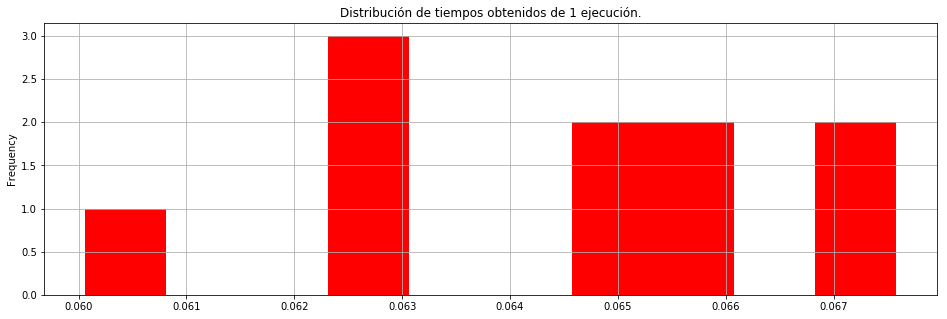

In [47]:
unique_executions.plot(kind='hist',color='red',
                        grid=True, title='Distribución de tiempos obtenidos de 1 ejecución.',
                        figsize=(16,5))
plt.show()

In [48]:
mean = np.mean(data)
std = np.std(data)
var = data.var()
print("Media", executions,"ejecuciones:", mean, "s.")
print("Desviación estándar", executions,"ejecuciones:", std, ".")
print("Intervalo de confianza", executions, "ejecuciones:",stats.norm.interval(0.05,loc=mean,scale=std) ,".")
print("Media 1 ejecución:", np.mean(unique_executions), "s.")
print("Acceleración respecto a versión secuencial:", mean_iterative/mean)

Media 25.0 ejecuciones: 1.6073537 s.
Desviación estándar 25.0 ejecuciones: 0.0557576656004 .
Intervalo de confianza 25.0 ejecuciones: (1.6038573164445618, 1.6108500835554387) .
Media 1 ejecución: 0.064294148 s.
Acceleración respecto a versión secuencial: 3.38347931759


## Conclusiones

Para el problema dado: 
- Se diseñó un algoritmo monohilo empleando instrucciones SIMD que aplica la función de transformación dada a los dinstintos elementos de las componentes RGB de 2 imágenes y crea una tercera. 
- Tras 10 muestreos se puede decir que dicho algoritmo es capáz de procesar 25 imágenes en $0.064294148$ segundos. O lo que es lo mismo, $15.6$ imágenes por segundo, unas 11 imágenes más que la versión secuencial por segundo.
- Si calculamos la aceleración de la versión SIMD con respecto a la versión secuencial observamos una aceleración de 3.38347931759.

--------------------------------
# Versión multihilo

------------------------------------------
# Referencias